In [1]:
import warnings
import itertools  # generates combination of p,d,q
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smf
from io import StringIO
import requests
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')

In [2]:
sales_data = pd.read_csv(r"C:\Users\RONALD\Desktop\MOUMITA\Study\Data Science\IMS PROSCHOOL - Business Analytics\Time Series\Case Studies - Questions with Solutions-20190819\Case 1\Tractor-Sales.csv")
sales_data.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [3]:
# since the date is not know, we will consider it to be from 1st of each month
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))

import calendar
sales_data['Month'] = dates.month
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_abbr[x])
sales_data['Year'] = dates.year

In [4]:
# Dropping & Renaming columns

sales_data.drop(['Month-Year'], axis=1, inplace=True)
sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
sales_data = sales_data[['Month','Year','Tractor-Sales']]

In [5]:
sales_data.head()

,Month,Year,Tractor-Sales
0,Jan,2003,141
1,Feb,2003,157
2,Mar,2003,185
3,Apr,2003,199
4,May,2003,203


In [6]:
# set the dates as the index of the dataframe, so that it can be treated as time-series dataframe.

sales_data.set_index(dates, inplace=True)

#check the data
sales_data.head()

,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [7]:
# extract out the time-series 
sales_ts = sales_data['Tractor-Sales']
sales_ts.head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Tractor-Sales, dtype: int64

C:\Users\RONALD\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tractor Sales')

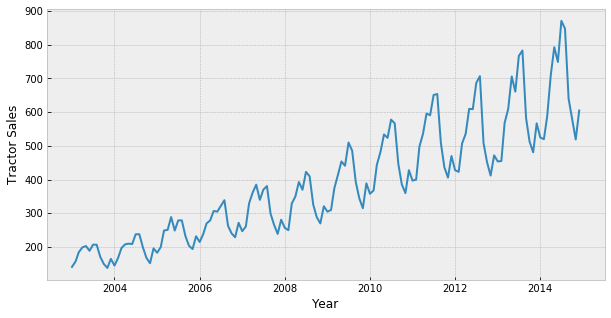

In [8]:
# plotting the time-series
plt.figure(figsize=(10,5))
plt.plot(sales_ts)
plt.xlabel('Year')
plt.ylabel('Tractor Sales')

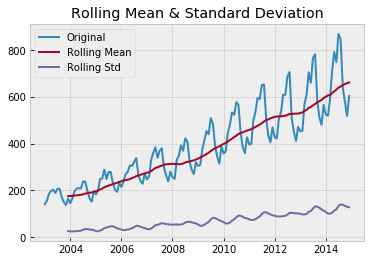

In [9]:
# Determining Rolling Statistics

rol_mean = sales_ts.rolling(window=12).mean()
rol_std = sales_ts.rolling(window=12).std()

# Plotting rolling statistics
orig = plt.plot(sales_ts, label="Original")
mean = plt.plot(rol_mean, label='Rolling Mean')
std = plt.plot(rol_std, label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


In [10]:
monthly_sales_data = pd.pivot_table(sales_data, values = 'Tractor-Sales', columns='Year', index='Month')
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


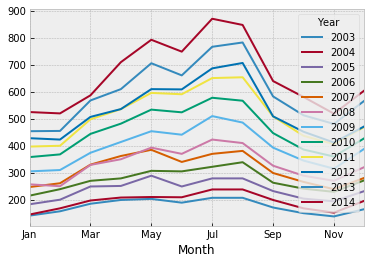

In [11]:
# to check month-wise plot for each year.
monthly_sales_data.plot()

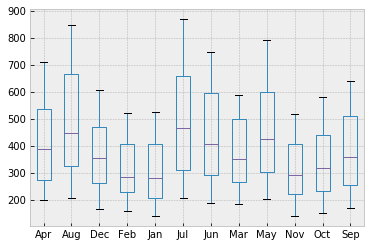

In [12]:
yearly_sales_data = pd.pivot_table(sales_data, values = 'Tractor-Sales', columns ='Month', index ='Year')
yearly_sales_data.head
yearly_sales_data.boxplot()

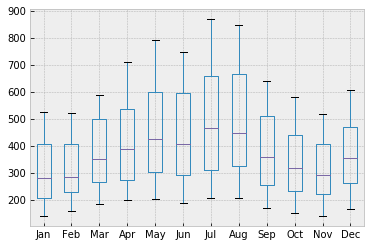

In [13]:
yearly_sales_data = pd.pivot_table(sales_data, values = 'Tractor-Sales', columns ='Month', index ='Year')
yearly_sales_data = yearly_sales_data.reindex(columns = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#yearly_sales_data.head()
yearly_sales_data.boxplot()

In [14]:
# decomposition of time series data

decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

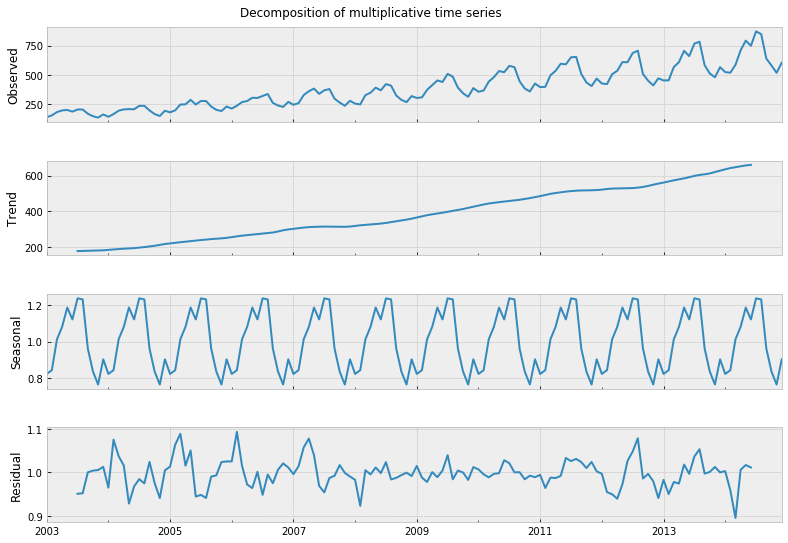

In [15]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [16]:
#define the d and q parameters to take any value between 0 and 1
q = d = range(0,2)

# define p parameter to take any value between 0 and 3
p = range(0,4)

# generate different combinations of pdq triplets
pdq = list(itertools.product(p,d,q))

# generate different combinations of seasonal p,q,d triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [27]:
warnings.filterwarnings("ignore")

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sales_ts,
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results = mod.fit()
            
            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [29]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))


The smallest AIC is 799.9064282670552 for model SARIMAX(3, 1, 0)x(3, 1, 1, 12)


In [30]:
# Lets fit the model

mod = sm.tsa.statespace.SARIMAX(sales_ts,
                               order = SARIMAX_model[AIC.index(min(AIC))][0],
                               seasonal_order = SARIMAX_model[AIC.index(min(AIC))][1],
                               enforce_stationarity=False,
                               enforce_invertibility=False)

results = mod.fit()

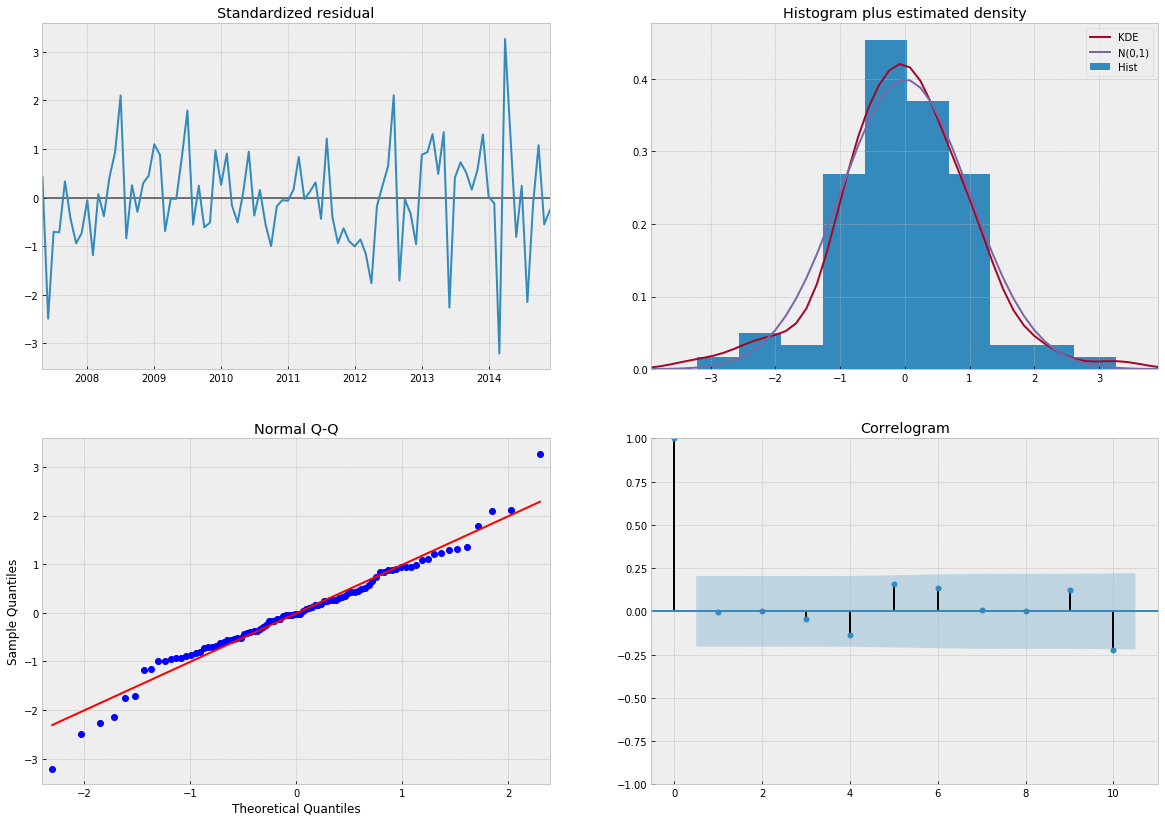

In [31]:
results.plot_diagnostics(figsize=(20,14))
plt.show()

In [ ]:
pred1 = results.get_prediction(start='2003-01-01', dynamic=True)
pred1_ci = pred1.conf_int()

In [ ]:
pred2 = results.get_forecast(start='2015-01-01')
pred2_ci = pred2.conf_int()

In [32]:
#1 - step ahead forecasting implies that each forcasted point is used too predict the following one.
pred0 = results.get_prediction(start='2003-01-01', dynamic= False)
pred0_ci = pred0.conf_int()

#In sample prediction with dynamic forecasting of the last year
pred1 = results.get_prediction(start='2003-01-01', dynamic=True)
pred1_ci = pred1.conf_int()

pred2 = results.get_forecast('2016-01-01')
pred2_ci = pred2.conf_int()

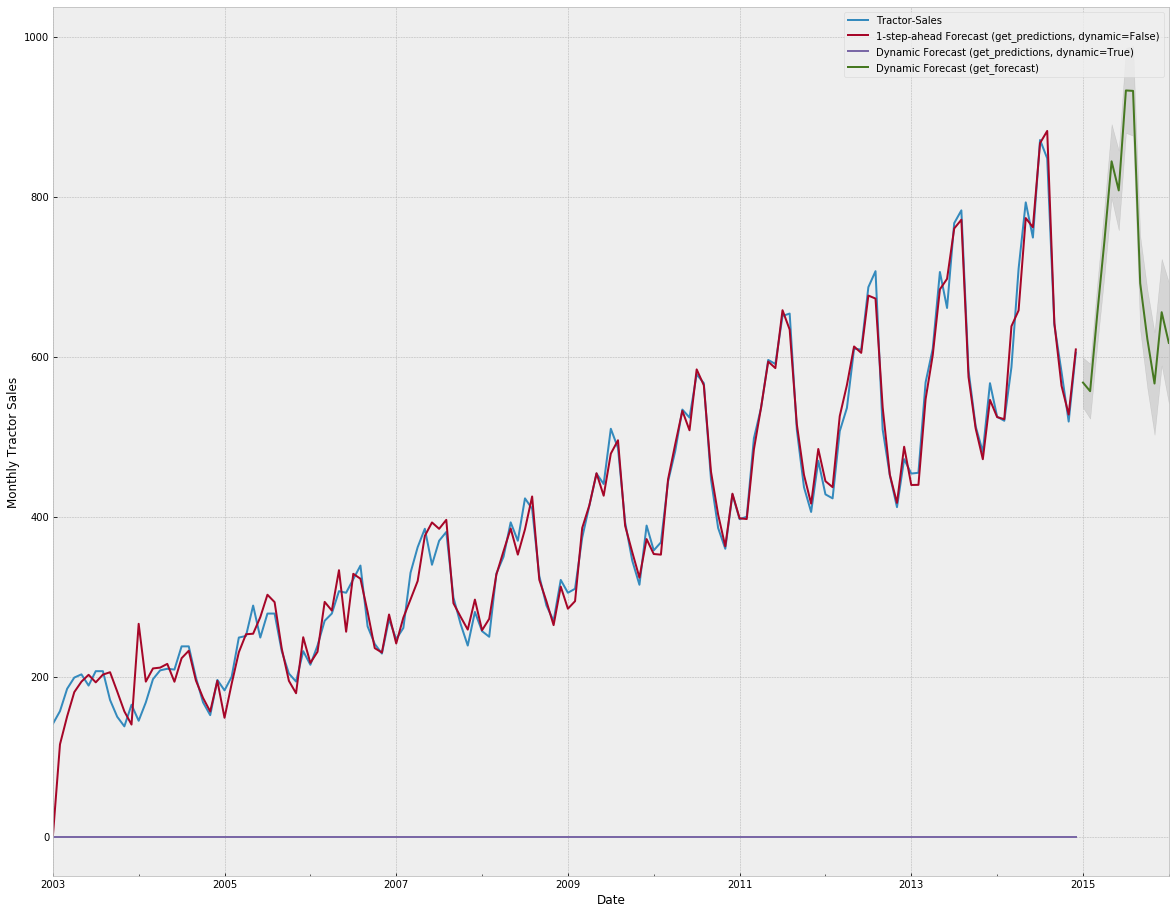

In [33]:
ax = sales_ts.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:,0], pred2_ci.iloc[:,1], color='k', alpha=.1)
plt.ylabel('Monthly Tractor Sales')
plt.xlabel('Date')
plt.legend()
plt.show()